<a href="https://colab.research.google.com/github/munsejin/Study2/blob/master/DL006_CNN_%EA%B0%9C%EC%99%80%EA%B3%A0%EC%96%91%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 개와 고양이 데이터 셋을 이용한 CNN

- 원래 데이터는 25,000개 (고양이 + 강아지)
- 여기서는 2000개로 학습을 시킨다
- 검증은 1000개의 이미지 사용

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


### 데이터 다운로드

In [ ]:
import os, os.path, shutil
import zipfile
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
!ls sample_data/

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [ ]:
if not os.path.exists("./data"):
    os.makedirs("./data")
if not os.path.exists("./data/cats_and_dogs_filtered.zip"):
  !wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O ./data/cats_and_dogs_filtered.zip

--2019-07-16 17:23:23--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.184.128, 2a00:1450:400c:c02::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.184.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘./data/cats_and_dogs_filtered.zip’

./data/cats_and_dog 100%[===================>]  65.43M  57.3MB/s    in 1.1s    

2019-07-16 17:23:24 (57.3 MB/s) - ‘./data/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
!ls

data  sample_data


### zip 파일을 풀어서 해당 폴더에 저장

In [ ]:
local_zip = './data/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./data')
zip_ref.close()

In [ ]:
!apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 4 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (597 kB/s)
Selecting previously unselected package tree.
(Reading database ... 130963 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!tree -d .

.
├── data
│   └── cats_and_dogs_filtered
│       ├── train
│       │   ├── cats
│       │   └── dogs
│       └── validation
│           ├── cats
│           └── dogs
└── sample_data

9 directories


In [ ]:
base_dir = './data/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
train_cats_dir

'./data/cats_and_dogs_filtered/train/cats'

### 파일 확인

In [ ]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.919.jpg', 'cat.149.jpg', 'cat.477.jpg', 'cat.145.jpg', 'cat.440.jpg', 'cat.832.jpg', 'cat.679.jpg', 'cat.673.jpg', 'cat.792.jpg', 'cat.684.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


### 이미지 샘플 확인

In [ ]:
# 표시할 행과 열
nrows = 4
ncols = 4

# 이미지 반복에 대한 인덱스
pic_index = 0

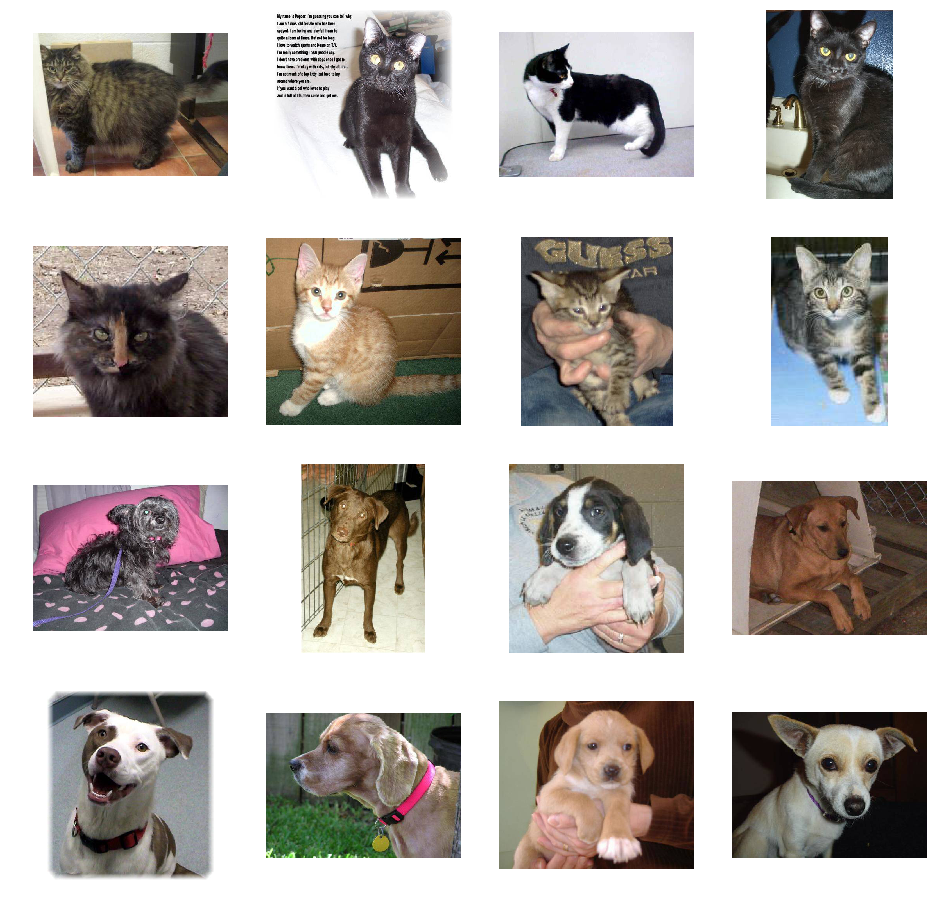

In [ ]:
# matplotlib 그림을 설정하고 4x4 사진에 맞게 크기를 조정
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # 축을 숨긴다

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

### 데이터 전처리

In [ ]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np 

In [ ]:
# 데이터 생성 (이미지 크기)
img_width = 150
img_height = 150

# 이미지의 스케일을 조정 (0~255 -> 0.0~1.0)
datagen = ImageDataGenerator(rescale = 1./255)

# (데이터폴더, 변경할 데이터크기, 배치크기, 모드) 
# 이미지 크기를 150x150으로 변경
# 20개의 샘플을 하나의 배치로 설정
# 모드는 binary_crossentropy를 사용하기 때문에 이진 레이블이 필요
train_generator = datagen.flow_from_directory(directory=train_dir,
											   target_size=(img_width,img_height),
											   classes=['dogs','cats'],
											   class_mode='binary',
											   batch_size=20)

validation_generator = datagen.flow_from_directory(directory=validation_dir,
											   target_size=(img_width,img_height),
											   classes=['dogs','cats'],
											   class_mode='binary',
											   batch_size=20)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### 모델 설정

In [ ]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
# 150x150 크기 이미지로 시작해서 7x7 크기 이미지로 특성 맵이 줄어들도록 구성
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

### 모델 실행

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])
print('훈련 시작....')

# 데이터 준비와 훈련을 동시에 병행진행
history = model.fit_generator(generator=train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

print('훈련 종료 !!')
print('가중치 저장')

model.save_weights('/gdrive/My Drive/Colab Notebooks/인공지능강의안/model/dogs_vs_cats_small_01.h5')

print('모든 가중치을 성공적으로 저장 !!')
#models.load_weights('/gdrive/My Drive/Colab Notebooks/인공지능강의안/model/dogs_vs_cats_small_weight_01.h5')

훈련 시작....


W0716 17:24:38.397904 140146234636160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/30
100/100 [==============================] - 16s 162ms/step - loss: 0.6896 - acc: 0.5280 - val_loss: 0.6696 - val_acc: 0.5880
Epoch 2/30
100/100 [==============================] - 10s 103ms/step - loss: 0.6705 - acc: 0.6065 - val_loss: 0.6494 - val_acc: 0.6120
Epoch 3/30
100/100 [==============================] - 10s 101ms/step - loss: 0.6292 - acc: 0.6525 - val_loss: 0.6164 - val_acc: 0.6710
Epoch 4/30
100/100 [==============================] - 10s 102ms/step - loss: 0.5847 - acc: 0.7030 - val_loss: 0.5852 - val_acc: 0.7040
Epoch 5/30
100/100 [==============================] - 10s 100ms/step - loss: 0.5452 - acc: 0.7220 - val_loss: 0.5700 - val_acc: 0.7080
Epoch 6/30
100/100 [==============================] - 10s 102ms/step - loss: 0.5156 - acc: 0.7375 - val_loss: 0.5635 - val_acc: 0.7150
Epoch 7/30
100/100 [==============================] - 10s 101ms/step - loss: 0.4820 - acc: 0.7765 - val_loss: 0.5593 - val_acc: 0.7120
Epoch 8/30
100/100 [==============================] - 1

### 결과 시각화

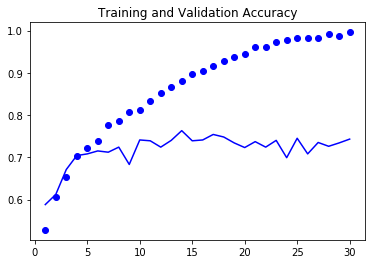

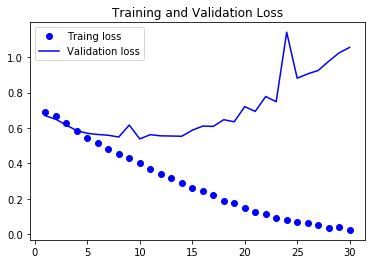

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["acc"]
val_acc =  history.history["val_acc"]
loss =  history.history["loss"]
val_loss =  history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Traing acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and Validation Accuracy")

plt.figure()
plt.plot(epochs, loss, "bo", label="Traing loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

- 과대적합 발생

In [ ]:
!ls data

cats_and_dogs_filtered	cats_and_dogs_filtered.zip


### 개와 고양이 예측하기

In [ ]:
Y_prediction = model.predict_generator(validation_generator, steps=5)
prediction = np.where(Y_prediction > .5, "개", "고양이")

for i in range(20):
  print(validation_generator.filenames[i])
  print(prediction[i])

dogs/dog.2000.jpg
['개']
dogs/dog.2001.jpg
['고양이']
dogs/dog.2002.jpg
['개']
dogs/dog.2003.jpg
['개']
dogs/dog.2004.jpg
['개']
dogs/dog.2005.jpg
['개']
dogs/dog.2006.jpg
['개']
dogs/dog.2007.jpg
['고양이']
dogs/dog.2008.jpg
['개']
dogs/dog.2009.jpg
['고양이']
dogs/dog.2010.jpg
['고양이']
dogs/dog.2011.jpg
['고양이']
dogs/dog.2012.jpg
['고양이']
dogs/dog.2013.jpg
['고양이']
dogs/dog.2014.jpg
['고양이']
dogs/dog.2015.jpg
['고양이']
dogs/dog.2016.jpg
['개']
dogs/dog.2017.jpg
['고양이']
dogs/dog.2018.jpg
['고양이']
dogs/dog.2019.jpg
['개']


## data augmentation과 드롭아웃 사용

- data augmentation (데이터 증식) : 데이터를 증가하거나 기존에 이미 만들어진 모델과 연동하는 것
- 전처리와 augmentation은 거의 성능이 좋아짐 (원본에 추가되는 개념이므로)
- 쉽고 패턴이 정해짐
- 단기간에 성능향상

In [ ]:
# 데이터 증식 조건
datagen_2 = ImageDataGenerator(
  rotation_range = 20,
  width_shift_range = 0.2,
  height_shift_range = 0.1,
  shear_range=0.1,
  zoom_range=0.1,
  horizontal_flip = True,
  fill_mode = 'nearest')

In [ ]:
fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

In [ ]:
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

x=image.img_to_array(img)  # 넘파이 배열로 변환
print(x.shape)
x=x.reshape((1,)+x.shape)
print(x.shape)

(150, 150, 3)
(1, 150, 150, 3)


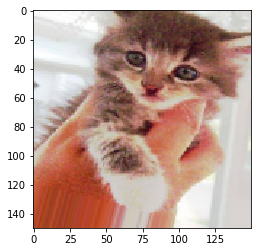

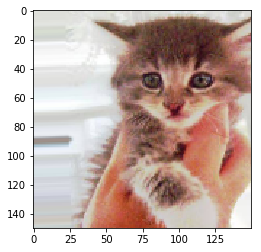

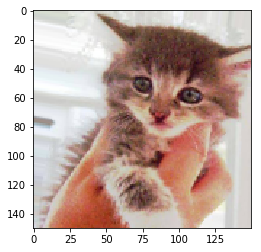

In [ ]:
i=1
for batch in datagen_2.flow(x, batch_size=1):
    plt.figure(i)
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 == 0:
      break
plt.show() 

In [ ]:
train_datagen = ImageDataGenerator(
  rescale= 1./255,
  rotation_range = 40,
  width_shift_range = 0.2,
  height_shift_range = 0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(directory=train_dir,
											   target_size=(img_width,img_height),
# 											   classes=['dogs','cats'],
											   class_mode='binary',
											   batch_size=32)

validation_generator = validation_datagen.flow_from_directory(directory=validation_dir,
											   target_size=(img_width,img_height),
# 											   classes=['dogs','cats'],
											   class_mode='binary',
											   batch_size=32)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# 모델
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# model.summary()

W0716 17:37:09.912082 140146234636160 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## 모델 실행 및 저장

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

print('starting training....')
history = model.fit_generator(
    generator=train_generator, 
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

print('training finished!!')

print('saving weights to Augment_CNN.h5')

model.save_weights('/gdrive/My Drive/Colab Notebooks/인공지능강의안/model/Augment_CNN.h5')

print('all weights saved successfully !!')
#model.load_weights('/gdrive/My Drive/Colab Notebooks/인공지능강의안/model/simple_CNN.h5')

starting training....
Epoch 1/100
100/100 [==============================] - 35s 349ms/step - loss: 0.6911 - acc: 0.5128 - val_loss: 0.6765 - val_acc: 0.6072
Epoch 2/100
100/100 [==============================] - 30s 304ms/step - loss: 0.6757 - acc: 0.5684 - val_loss: 0.6420 - val_acc: 0.6353
Epoch 3/100
100/100 [==============================] - 30s 303ms/step - loss: 0.6630 - acc: 0.5891 - val_loss: 0.6250 - val_acc: 0.6599
Epoch 4/100
100/100 [==============================] - 31s 309ms/step - loss: 0.6309 - acc: 0.6375 - val_loss: 0.6086 - val_acc: 0.6675
Epoch 5/100
100/100 [==============================] - 31s 309ms/step - loss: 0.6331 - acc: 0.6381 - val_loss: 0.5780 - val_acc: 0.7069
Epoch 6/100
100/100 [==============================] - 30s 304ms/step - loss: 0.6065 - acc: 0.6662 - val_loss: 0.5870 - val_acc: 0.6707
Epoch 7/100
100/100 [==============================] - 31s 310ms/step - loss: 0.5970 - acc: 0.6722 - val_loss: 0.5590 - val_acc: 0.7170
Epoch 8/100
100/100 [=====

### 결과 시각화

Text(0.5, 1.0, 'Training and validation loss')

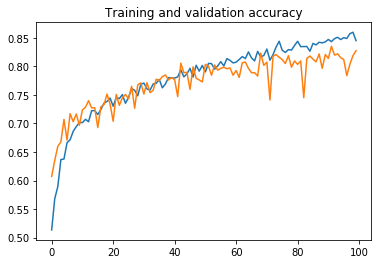

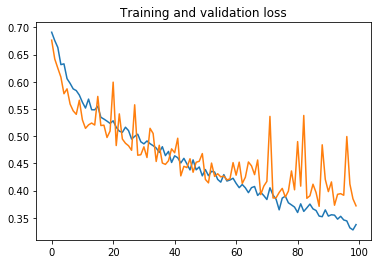

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150), batch_size=32, class_mode = "binary")

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size = (150, 150), batch_size=32, class_mode = "binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

In [ ]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, verbose=0, validation_data=validation_generator, validation_steps=50)

model.save("/gdrive/My Drive/Colab Notebooks/인공지능강의안/model/dogs_vs_cats_small_02.h5")

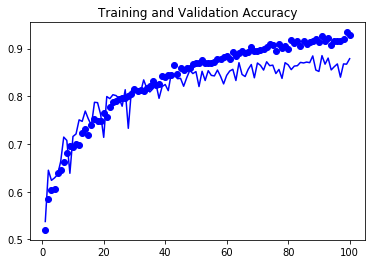

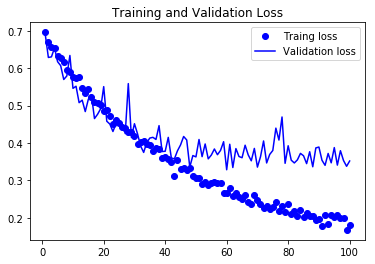

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["acc"]
val_acc =  history.history["val_acc"]
loss =  history.history["loss"]
val_loss =  history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Traing acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and Validation Accuracy")

plt.figure()
plt.plot(epochs, loss, "bo", label="Traing loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

### 중간층 시각화하기

In [ ]:
from keras.models import load_model

model = load_model('/gdrive/My Drive/Colab Notebooks/인공지능강의안/model/dogs_vs_cats_small_02.h5')
model.summary() 

W0715 17:50:30.701248 139771776386944 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [ ]:
img_path = './data/cats_and_dogs_filtered/test/cats/cat.1500.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))

# 이미지를 4차원 텐서로 변환
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


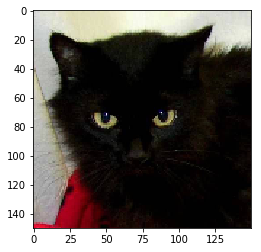

In [ ]:
from keras import models
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

### 중간층 시각화하기

(1, 148, 148, 32)


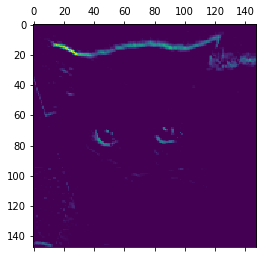

In [ ]:
# 상위 8개 층의 출력을 추출
layer_outputs = [layer.output for layer in model.layers[:8]]
# 입력에 대해 8개 층의 출력을 반환하는 모델을 만듬
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
# 층의 활성화마다 하나씩 8개의 넘파이 배열로 이루어진 리스트를 반환
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

# 22번째 채널의 특성맵을 시각화하기
plt.matshow(first_layer_activation[0, :, :, 22], cmap='viridis')
plt.show()

##(실습) 다른 층이나 채널의 특성맵을 확인해보자

### 모든 채널 시각화하기

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


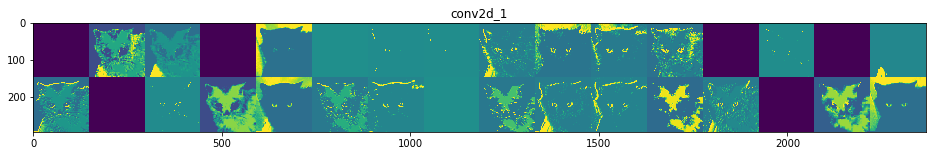

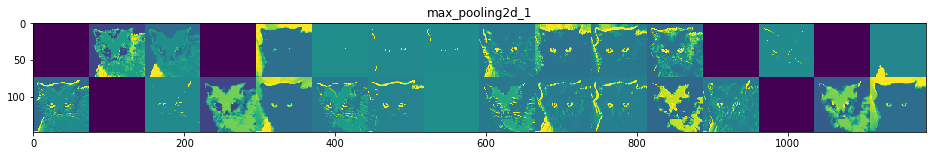

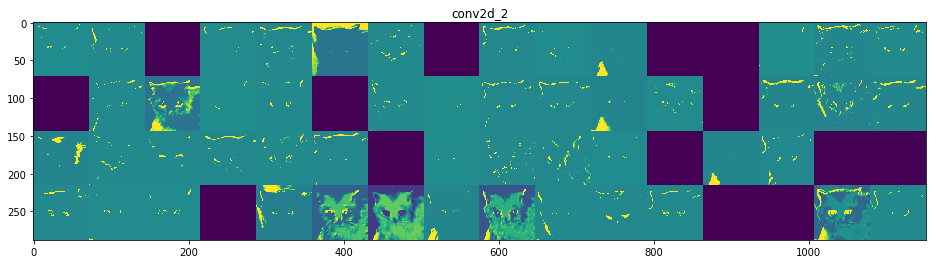

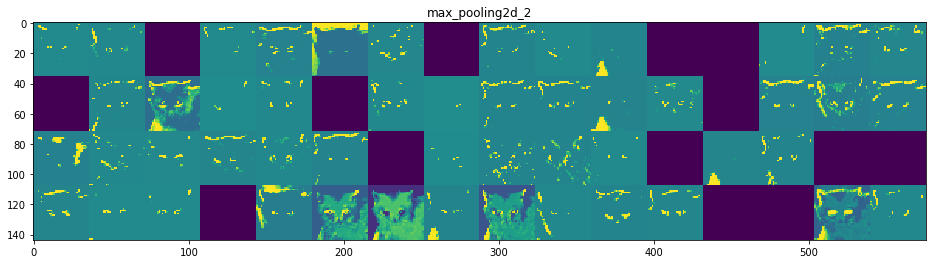

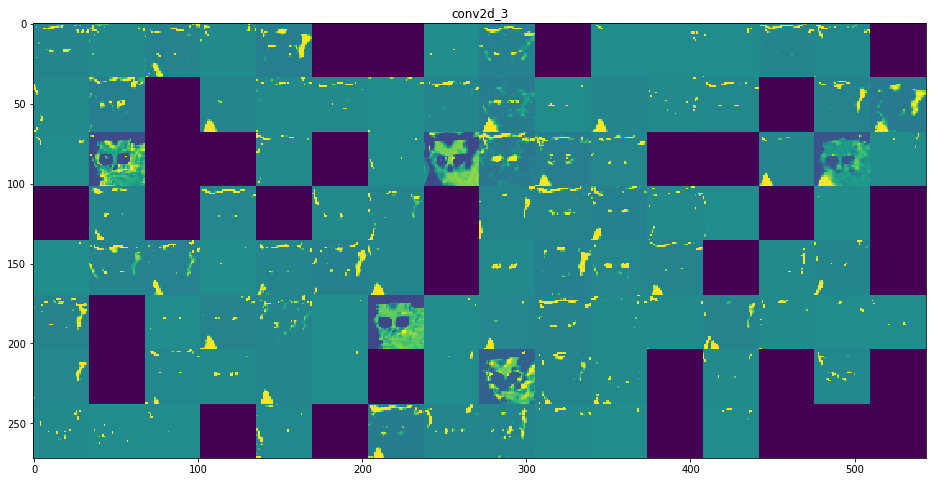

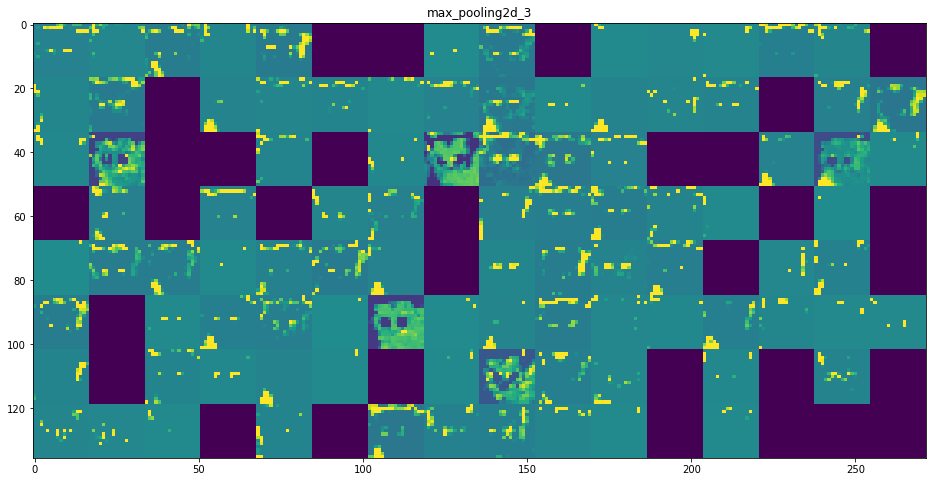

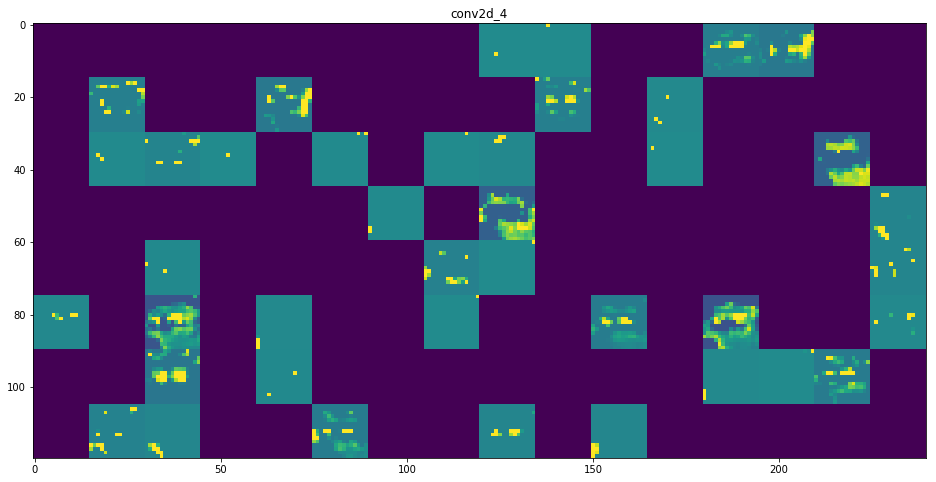

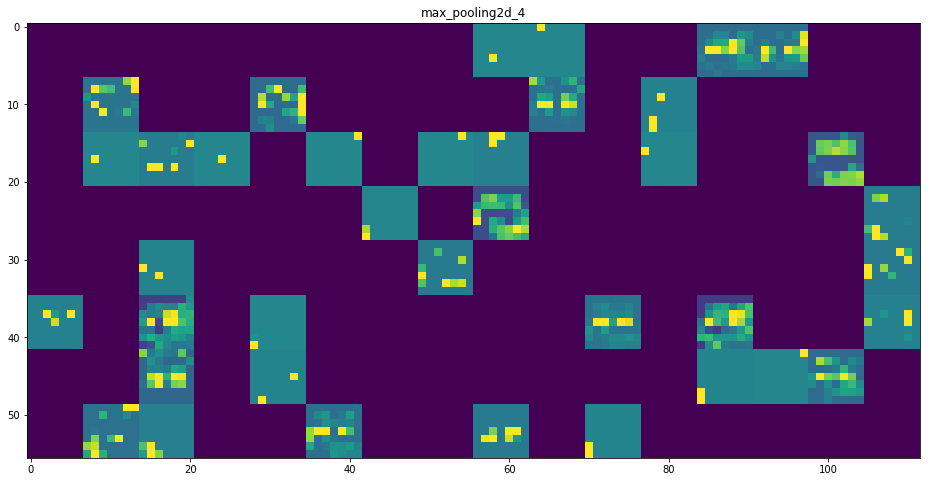

In [ ]:
# 상위 8 개 층의 이름을 그래프 제목으로 사용
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

# 한 줄에 표시하는 이미지 수
images_per_row = 16

# 특성 맵을 그림
for layer_name, layer_activation in zip(layer_names, activations):
    # 특성 맵에 있는 특성의 수
    n_features = layer_activation.shape[-1]
    # 특성 맵의 크기 (1, size, size, n_features)
    size = layer_activation.shape[1]
    # 활성화 채널을 위한 그리드 크기를 구함
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    # 각 활성화를 하나의 큰 그리드에 채움
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]

            # 그래프로 나타내기 좋게 특성을 처리
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # 그리드를 출력
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()